## imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

# ToxCast

## Splitting Data

In [56]:
df = pd.read_csv('final_toxcast.csv')

In [57]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

## Modeling

#### Metric Functions

In [58]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    display(
        pd.crosstab(y_actual,
                    y_predicted,
                    rownames=["Actual"],
                    colnames=["Predicted"]))


def generate_auc_roc_curve(clf, X_test, y_test):
    sns.set(style="darkgrid")
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.figure(dpi=100)
    plt.plot(fpr,
             tpr,
             label="AUC ROC Curve with Area Under the curve =%.2f" % auc)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

### Adaboost Classifier

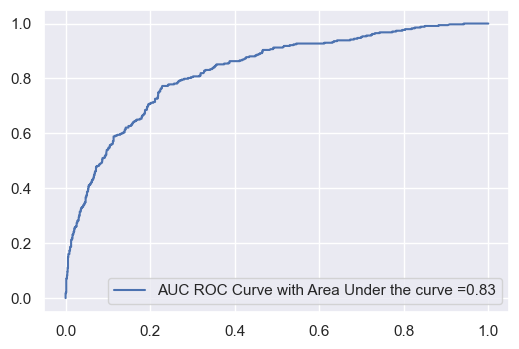

Accuracy =  0.8213146139119336
Precision =  0.6097560975609756
Recall =  0.5102040816326531
F1 Score =  0.5555555555555556


Predicted,0.0,1.0
Actual,,
0.0,1112,112
1.0,168,175


In [59]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_hat = ada_clf.predict(X_test)
generate_auc_roc_curve(ada_clf, X_test, y_test)
generate_model_report(y_test, y_hat)

In [25]:
roc_auc_score(y_train  ,ada_clf.predict_proba(X_train)[:, 1])

0.866355405028499

In [26]:
roc_auc_score(y_test  ,ada_clf.predict_proba(X_test)[:, 1])

0.8289506278701957

# QM9

## Modeling

In [ ]:
qm9 = pd.read_csv('final_qm9.csv')

In [ ]:
qm9.head()

In [ ]:
X = qm9.drop(['lable'], axis=1)
y = qm9['lable']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Adaboost Regressor

In [ ]:
ada_regressor = AdaBoostRegressor()
ada_regressor.fit(X_train, y_train)
y_hat = ada_regressor.predict(X_test)

In [ ]:
r2_score(ada_regressor.predict(X_train) , y_train)

In [ ]:
r2_score(y_hat , y_test)

# Tox21

In [83]:
X = pd.read_csv('tox21_x.csv')
y = pd.read_csv('tox21_y.csv')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y['NR-AR'],
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

## Modeling

### Adaboost Classifer

In [85]:
grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator':
    [DecisionTreeClassifier(max_depth=1),
     DecisionTreeClassifier(max_depth=5)]
}
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [86]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                           param_grid=grid,
                           n_jobs=-1,
                           cv=cv,
                           scoring='roc_auc',
                           verbose=2)

In [87]:
grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='roc_auc', verbose=2)

#### Train Score

In [88]:
print(roc_auc_score(y_train , grid_search.predict_proba(X_train)[:, 1]))

0.8797625181200551


#### Test Score

In [89]:
print(roc_auc_score(y_test , grid_search.predict_proba(X_test)[:, 1]))

0.7528569101149746


#### Roc-Auc Curve

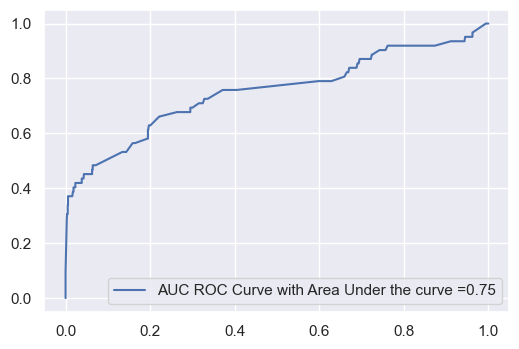

Accuracy =  0.9661602209944752
Precision =  0.8095238095238095
Recall =  0.27419354838709675
F1 Score =  0.4096385542168674


Predicted,0.0,1.0
Actual,,
0.0,1382,4
1.0,45,17


In [90]:
y_hat = grid_search.predict(X_test)
generate_auc_roc_curve(grid_search, X_test, y_test)
generate_model_report(y_test, y_hat)

As seen in this model there is no overfitting and everything worked well

In [91]:
grid_search.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1)

###  Handle overfitting

In [95]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1 , n_estimators=20)

In [97]:
ada.fit(X_train , y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=20)

In [99]:
print(roc_auc_score(y_train , ada.predict_proba(X_train)[:, 1]))

0.8335956738914019


In [98]:
print(roc_auc_score(y_test , ada.predict_proba(X_test)[:, 1]))

0.7906426011264721
